<a href="https://colab.research.google.com/github/HeshanNavindu-7/oilspill-detection/blob/main/oilspill_1_gausian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/saanvitayal07/oil-spill-and-no-oil-spill")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: heshannavindu
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saanvitayal07/oil-spill-and-no-oil-spill


100%|██████████| 26.5M/26.5M [00:00<00:00, 100MB/s]


# **visualizations**

In [4]:
import os
import random
import matplotlib.pyplot as plt
import cv2

#define path
dataset_dir="/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix"
class_count={}
for detection_class in os.listdir(dataset_dir):
  print(detection_class)
  class_dir= os.path.join(dataset_dir,detection_class)
  if os.path.isdir(class_dir):
    num_images=len(os.listdir(class_dir))
    class_count[detection_class]=num_images




train
test


Train Data
Displaying 4 samples from 'nospill' class:
Displaying 4 samples from 'oilspill' class:


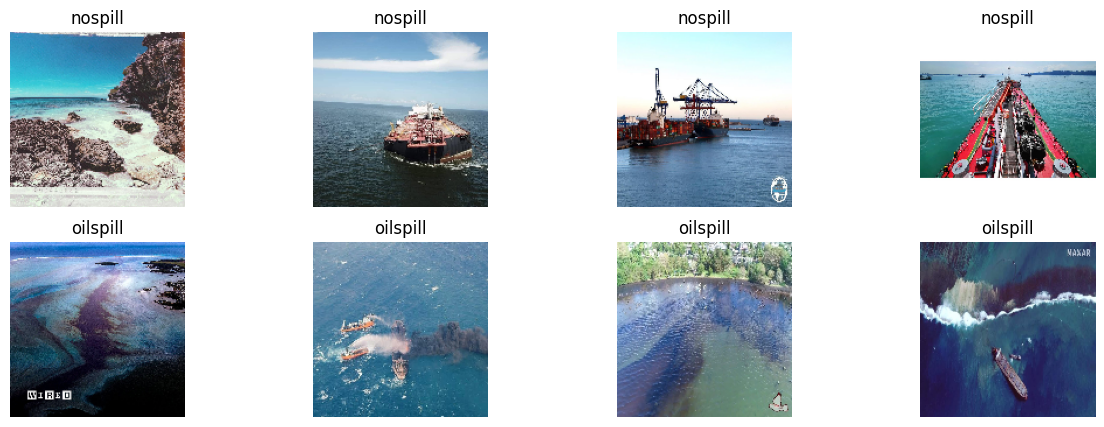

Test Data
Displaying 4 samples from 'nospill' class:
Displaying 4 samples from 'oilspill' class:


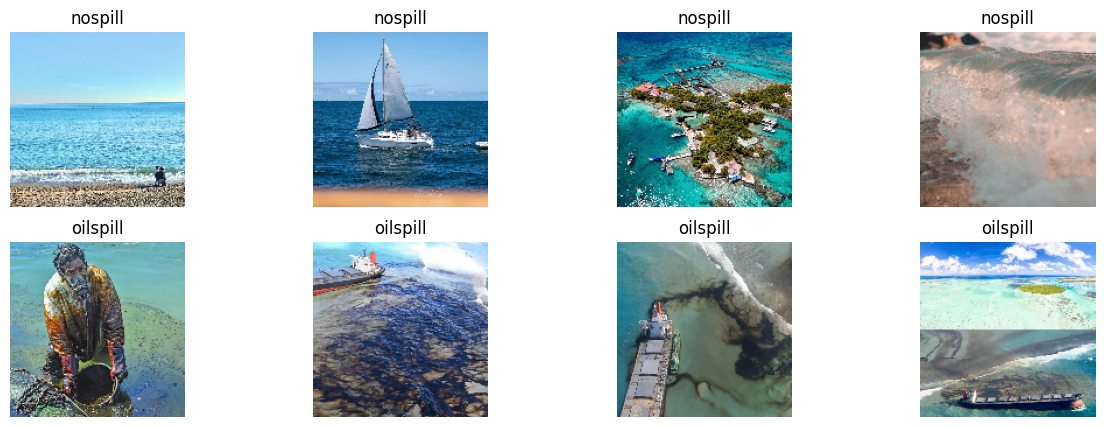

In [5]:
import cv2
import matplotlib.pyplot as plt
import os

# Define subdirectories for train and test data
train_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/train'
test_dir = '/content/oil-spill-and-no-oil-spill/oilspill_dataset_fix/test'

# Define image size and batch size
target_size = (150, 150)
batch_size = 32

# Define classes
classes = ['nospill', 'oilspill']

# Display sample data
def display_sample(directory, num_samples=4):
    fig, axs = plt.subplots(len(classes), num_samples, figsize=(15, 5))
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(directory, class_name)
        print(f"Displaying {num_samples} samples from '{class_name}' class:")

        for j, filename in enumerate(os.listdir(class_dir)):
            if j >= num_samples:
                break
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, target_size)  # Resize image
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            axs[i, j].set_title(class_name)
    plt.show()

print("Train Data")
display_sample(train_dir)
print("Test Data")
display_sample(test_dir)


In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define a function to add Gaussian noise
def add_gaussian_noise(img):
    row, col, ch = img.shape
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = img + gauss
    return np.clip(noisy, 0, 1)  # Ensure the pixel values are within [0, 1]

# Define preprocessing and data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    validation_split=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.1,
    preprocessing_function=add_gaussian_noise
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Set as validation data
)

Found 159 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


## Build DL Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_16 (Ba  (None, 148, 148, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_17 (Ba  (None, 72, 72, 64)       

In [40]:
!pip install visualkeras

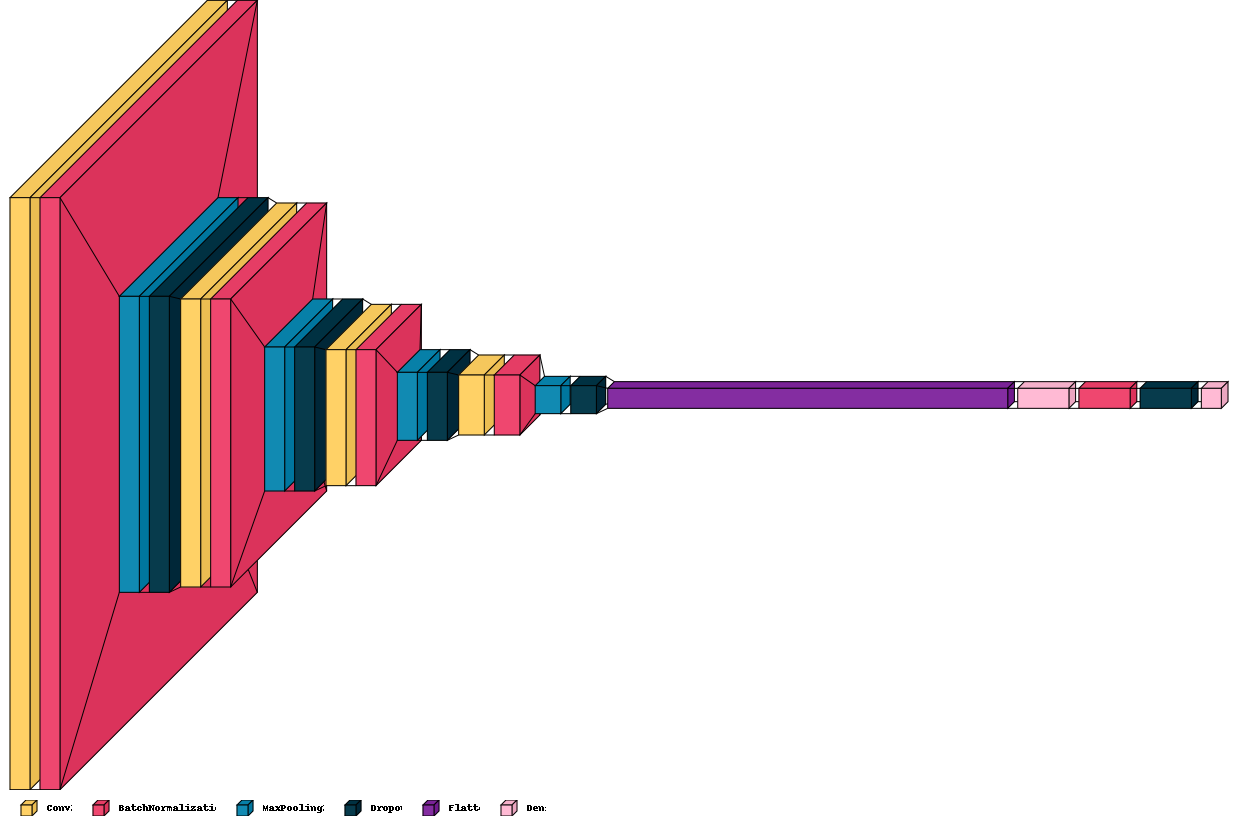

In [41]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [42]:
from tensorflow.keras.metrics import Precision, Recall

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])


In [43]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/15
4/4 [==============================] - 26s 4s/step - loss: 1.8877 - accuracy: 0.4173 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/15
4/4 [==============================] - 15s 4s/step - loss: 1.1772 - accuracy: 0.4803 - val_loss: 0.6936 - val_accuracy: 0.4688
Epoch 3/15
4/4 [==============================] - 15s 4s/step - loss: 0.9366 - accuracy: 0.5906 - val_loss: 0.6912 - val_accuracy: 0.5312
Epoch 4/15
4/4 [==============================] - 18s 4s/step - loss: 1.0742 - accuracy: 0.4882 - val_loss: 0.6923 - val_accuracy: 0.5312
Epoch 5/15
4/4 [==============================] - 14s 3s/step - loss: 0.9628 - accuracy: 0.5354 - val_loss: 0.6922 - val_accuracy: 0.5625
Epoch 6/15
4/4 [==============================] - 16s 4s/step - loss: 0.9803 - accuracy: 0.4766 - val_loss: 0.7099 - val_accuracy: 0.4688
Epoch 7/15
4/4 [==============================] - 16s 4s/step - loss: 0.8661 - accuracy: 0.5039 - val_loss: 0.7030 - val_accuracy: 0.5625
Epoch 8/15
4/4 [==================

In [44]:
# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=batch_size,
    class_mode='binary'  # Since it's a binary classification task
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Found 49 images belonging to 2 classes.
2/2 [==============================] - 1s 318ms/step - loss: 0.6621 - accuracy: 0.5714
Test Loss: 0.6621353626251221
Test Accuracy: 0.5714285969734192


In [47]:
# Define the test data generator
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=batch_size,
    class_mode='binary'  # Since it's a binary classification task
)

# Evaluate the model on the test dataset
train_loss, train_accuracy = model.evaluate(train_generator)
print(f'Test Loss: {train_loss}')
print(f'Test Accuracy: {train_accuracy}')

Found 197 images belonging to 2 classes.
7/7 [==============================] - 7s 965ms/step - loss: 0.6956 - accuracy: 0.4975
Test Loss: 0.6955524682998657
Test Accuracy: 0.4974619150161743


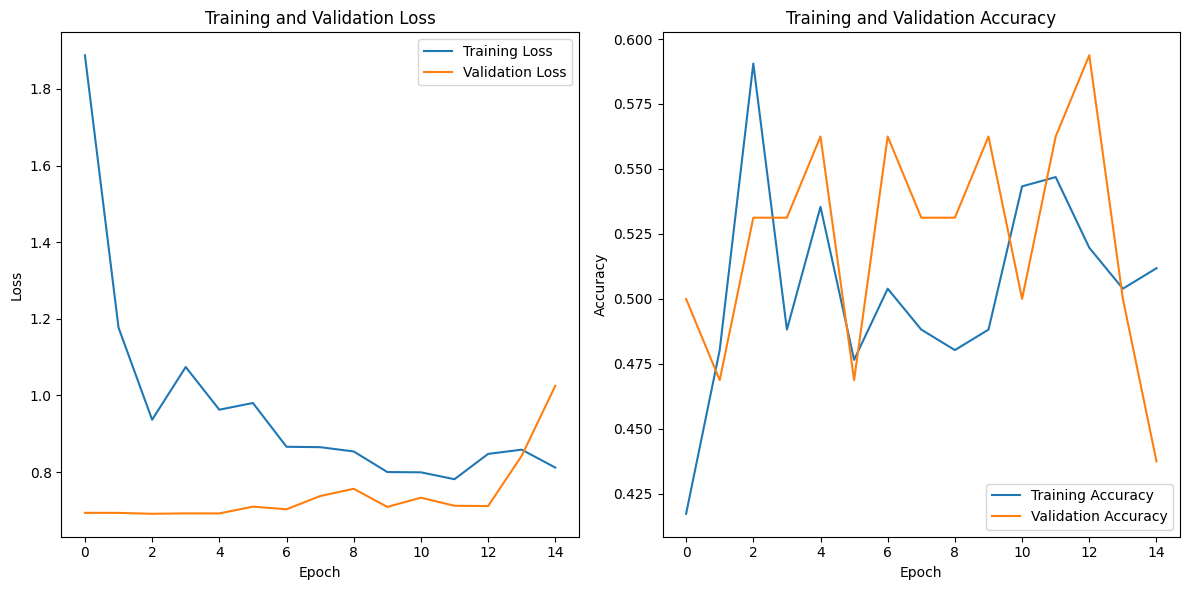

In [45]:
import matplotlib.pyplot as plt

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()

# Plot training and validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [46]:

print("Results")
result = model.evaluate_generator(test_generator, verbose=1)

print("%s%.2f" % ("Loss     : ", result[0]))
print("%s%.2f%s" % ("Accuracy : ", result[1] * 100, "%"))


Results


<ipython-input-46-11f1a34e3d1a>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result = model.evaluate_generator(test_generator, verbose=1)


2/2 [==============================] - 1s 307ms/step - loss: 0.6621 - accuracy: 0.5714
Loss     : 0.66
Accuracy : 57.14%


2/2 [==============================] - 3s 459ms/step


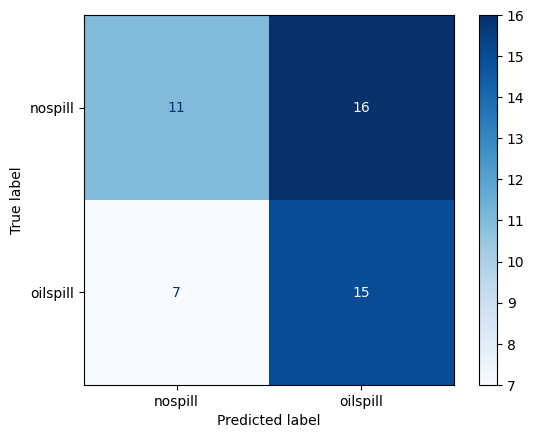

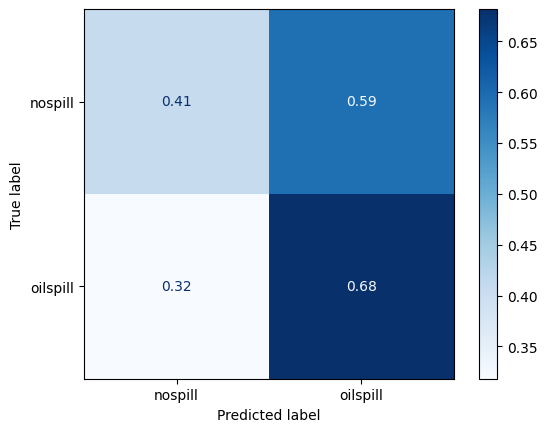

              precision    recall  f1-score   support

     nospill       0.61      0.41      0.49        27
    oilspill       0.48      0.68      0.57        22

    accuracy                           0.53        49
   macro avg       0.55      0.54      0.53        49
weighted avg       0.55      0.53      0.52        49



In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt
# Confusion Matrix and Classification Report
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.round(y_pred).astype(int).flatten()

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.show()

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))